# Proyecto final

#### Oscar Gerardo Hernández Martínez

### Importando librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
pd.options.mode.chained_assignment = None

### Carga de datos

In [ ]:
data = pd.read_csv("music_genre.csv")

#### Conjunto extraído de:

https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

Verificamos que haya cargado correctamente

In [ ]:
data.head() #Primeros 5 valores

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
data.tail() #Últimos 5 valores

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.0,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.0,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.0,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.0,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop
50004,63470.0,Naughty By Nature,Hip Hop Hooray,67.0,0.10200,0.862,267267.0,0.642,0.0,F#,0.272,-13.652,Minor,0.1010,99.20100000000001,4-Apr,0.765,Hip-Hop


### Análisis Exploratorio

In [ ]:
data.shape #Estructuta general del conjunto de datos (5,005 filas y 18 columnas)

(50005, 18)

In [ ]:
columnas = data.columns.to_list() #Lista con todos los nombres de las columnas
columnas

['instance_id',
 'artist_name',
 'track_name',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'obtained_date',
 'valence',
 'music_genre']

In [ ]:
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


#### Apreciaciones:

- El campo **instance_id** si bien es un dato numérico, solo sirve como identificador de la canción, por lo que no vale la pena incluirlo dentro de nuestro modelo.

- El campo **duration_ms** parece tener datos faltantes, ya que una duración de -1 no es real, por lo que valdrá la pena realizar una revisión a detalle.

- El campo de **loudness** tiene valores negativos, por lo que probblemente sea una variable que no podamos usar para entrenar un modelo de Naive Bayes.

In [ ]:
data.describe(include=['O'])

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,10
top,empty_field,Home,G,Major,?,4-Apr,Electronic
freq,2489,16,5727,32099,4980,44748,5000


#### Apreciaciones:

- El campo **artist_name** cuenta con 2,489 campos vacíos. Aproximadamente un 4% de los datos.

- El campo **tempo** si bien intuitivamente podría considerarse como un dato numérico, aquí se considera un dato categórico, el cual como moda tiene el atributo '?'. Valdrá la pena revisar si es porque no se cuenta con el dato o bien se debe a algo más.

- El atributo **obtained_date** no servirá en la realización del modelo, pues en su mayoría se trata de la misma fecha (4 de abril).

- Tenemos 10 géneros únicos.

In [ ]:
data.dtypes #Tipos de datos de cada atributo

,0
instance_id,float64
artist_name,object
track_name,object
popularity,float64
acousticness,float64
danceability,float64
duration_ms,float64
energy,float64
instrumentalness,float64
key,object


#### Verificamos si el conjunto de datos tiene valores nulos:

In [ ]:
columnas = data.columns.to_list() #Lista con todos los nombres de las columnas
for columna in columnas:
    missing = pd.isnull(data[columna]).values.ravel().sum() #Suma de los datos faltantes por columna
    print(f'La columna {columna} tiene {missing} elementos faltantes.')

La columna instance_id tiene 5 elementos faltantes.
La columna artist_name tiene 5 elementos faltantes.
La columna track_name tiene 5 elementos faltantes.
La columna popularity tiene 5 elementos faltantes.
La columna acousticness tiene 5 elementos faltantes.
La columna danceability tiene 5 elementos faltantes.
La columna duration_ms tiene 5 elementos faltantes.
La columna energy tiene 5 elementos faltantes.
La columna instrumentalness tiene 5 elementos faltantes.
La columna key tiene 5 elementos faltantes.
La columna liveness tiene 5 elementos faltantes.
La columna loudness tiene 5 elementos faltantes.
La columna mode tiene 5 elementos faltantes.
La columna speechiness tiene 5 elementos faltantes.
La columna tempo tiene 5 elementos faltantes.
La columna obtained_date tiene 5 elementos faltantes.
La columna valence tiene 5 elementos faltantes.
La columna music_genre tiene 5 elementos faltantes.


#### Borrado de valores que faltan

In [ ]:
data = data.dropna(axis = 0, how = 'all') #Borrado de las filas que contienen valores nulos
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


Confirmación

In [ ]:
for columna in columnas:
    missing = pd.isnull(data[columna]).values.ravel().sum() #Suma de los valores faltantes por columna
    print(f'La columna {columna} tiene {missing} elementos faltantes.')

La columna instance_id tiene 0 elementos faltantes.
La columna artist_name tiene 0 elementos faltantes.
La columna track_name tiene 0 elementos faltantes.
La columna popularity tiene 0 elementos faltantes.
La columna acousticness tiene 0 elementos faltantes.
La columna danceability tiene 0 elementos faltantes.
La columna duration_ms tiene 0 elementos faltantes.
La columna energy tiene 0 elementos faltantes.
La columna instrumentalness tiene 0 elementos faltantes.
La columna key tiene 0 elementos faltantes.
La columna liveness tiene 0 elementos faltantes.
La columna loudness tiene 0 elementos faltantes.
La columna mode tiene 0 elementos faltantes.
La columna speechiness tiene 0 elementos faltantes.
La columna tempo tiene 0 elementos faltantes.
La columna obtained_date tiene 0 elementos faltantes.
La columna valence tiene 0 elementos faltantes.
La columna music_genre tiene 0 elementos faltantes.


#### Verificación del balance del conjunto de datos

In [ ]:
data['music_genre'].value_counts()

,count
music_genre,
Electronic,5000
Anime,5000
Jazz,5000
Alternative,5000
Country,5000
Rap,5000
Blues,5000
Rock,5000
Classical,5000


Tenemos un conjunto de datos balanceado, con 10 géneros diferentes y 5,000 datos de cada uno.

#### Columnas numéricas

In [ ]:
#Filtro de las variables numéricas
numericas = []
for col in columnas:
    if type(data[col][0]) == np.float64:
        numericas.append(col)
numericas

['instance_id',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'valence']

#### Datos de artistas

In [ ]:
data['artist_name'].value_counts()

,count
artist_name,
empty_field,2489
Nobuo Uematsu,429
Wolfgang Amadeus Mozart,402
Ludwig van Beethoven,317
Johann Sebastian Bach,314
...,...
Ward Davis,1
A.A. Bondy,1
Iris DeMent,1


Como se puede apreciar, contrario al género, los datos de artistas no están tan balanceados, por lo que considerar este atributo puede no otorgar valor a nuestros modelos.

In [ ]:
empty = data[data['artist_name'] == 'empty_field']
empty.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
19,66905.0,empty_field,7th Sevens,50.0,0.0281,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,4-Apr,0.199,Electronic
25,36047.0,empty_field,Revolution,34.0,0.0236,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,4-Apr,0.418,Electronic
44,37340.0,empty_field,World (The Price Of Love) - [Radio Edit] [2015...,31.0,0.0035,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.61,4-Apr,0.841,Electronic
128,61549.0,empty_field,Down With Me - VIP,32.0,0.0139,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,4-Apr,0.179,Electronic
135,38747.0,empty_field,Olvidela Compa,44.0,0.1530,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.01299999999999,4-Apr,0.476,Electronic


In [ ]:
faltantes = empty.shape[0]/data.shape[0]*100
print(f"El {faltantes:2.4}% son artistas desconocidos")

El 4.978% son artistas desconocidos


#### Relaciones de las variables con respecto al género

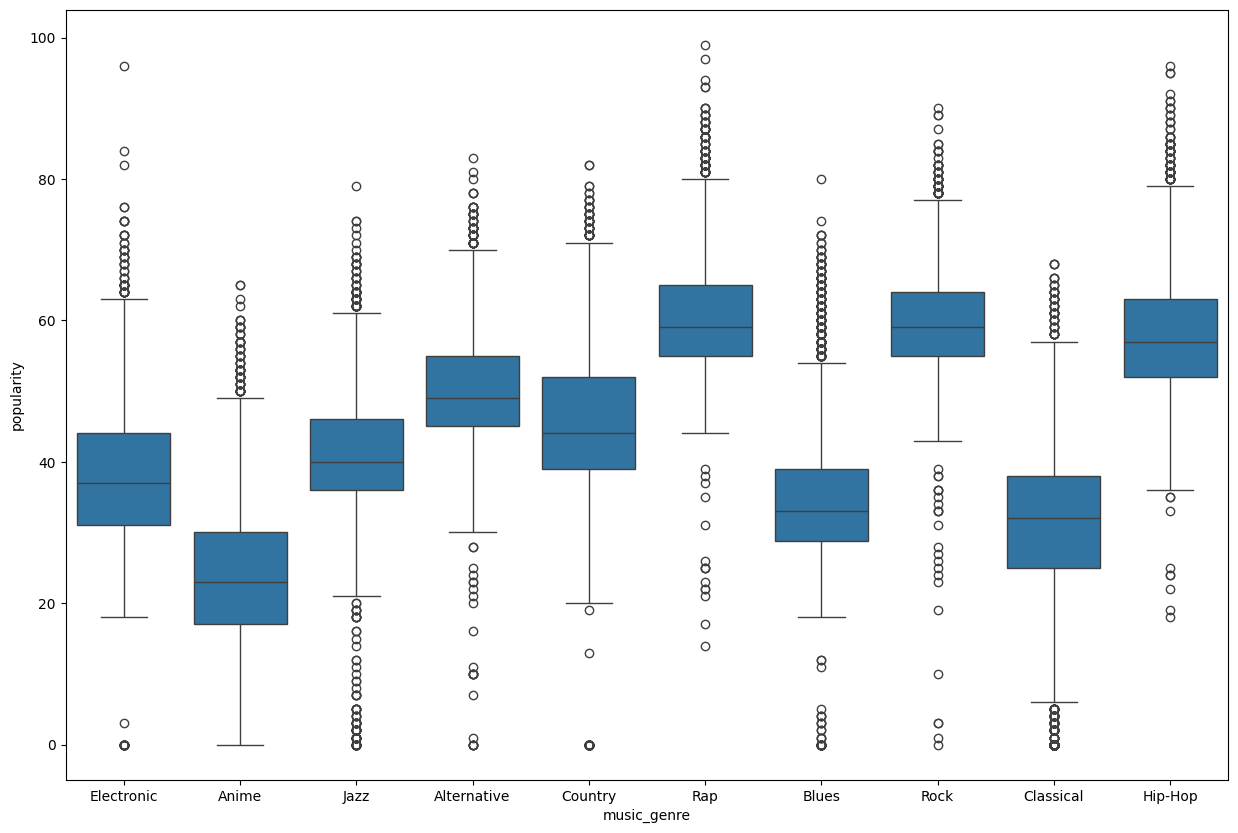

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='popularity')
plt.show()

En este conjunto de datos, podemos apreciar que los géneros **Rap**, **Rock** y **Hip-Hop** tienen una media de popularidad mayor, mientras que los géneros **Anime**, **Blues** y **Classical** son los menos populares.

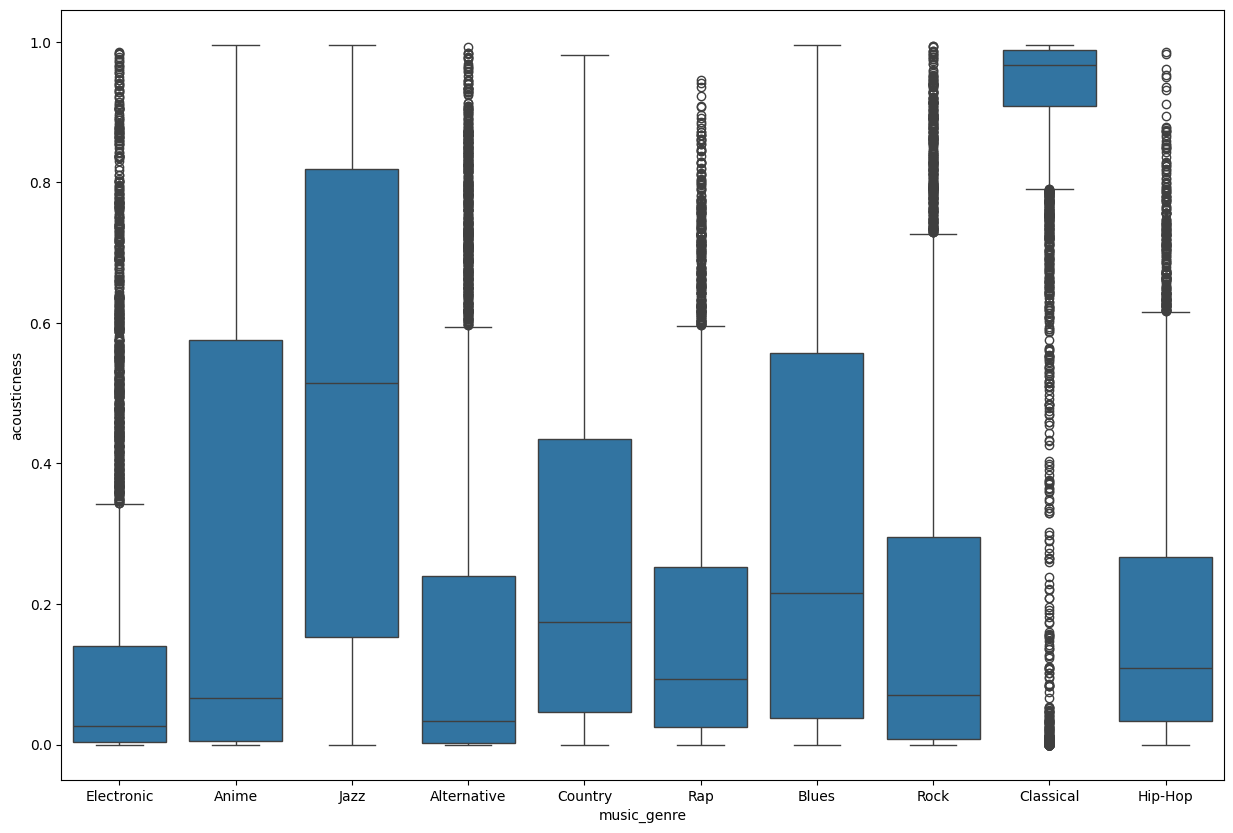

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='acousticness')
plt.show()

De acuerdo con el conjunto de datos, el género **Classical** se comporta de una forma completamente atípica con respecto a todos los demás, ya que su media de **acousticness** es significativamente mayor.

Este dato podrá ser importante para que nuestro clasificador funcione.

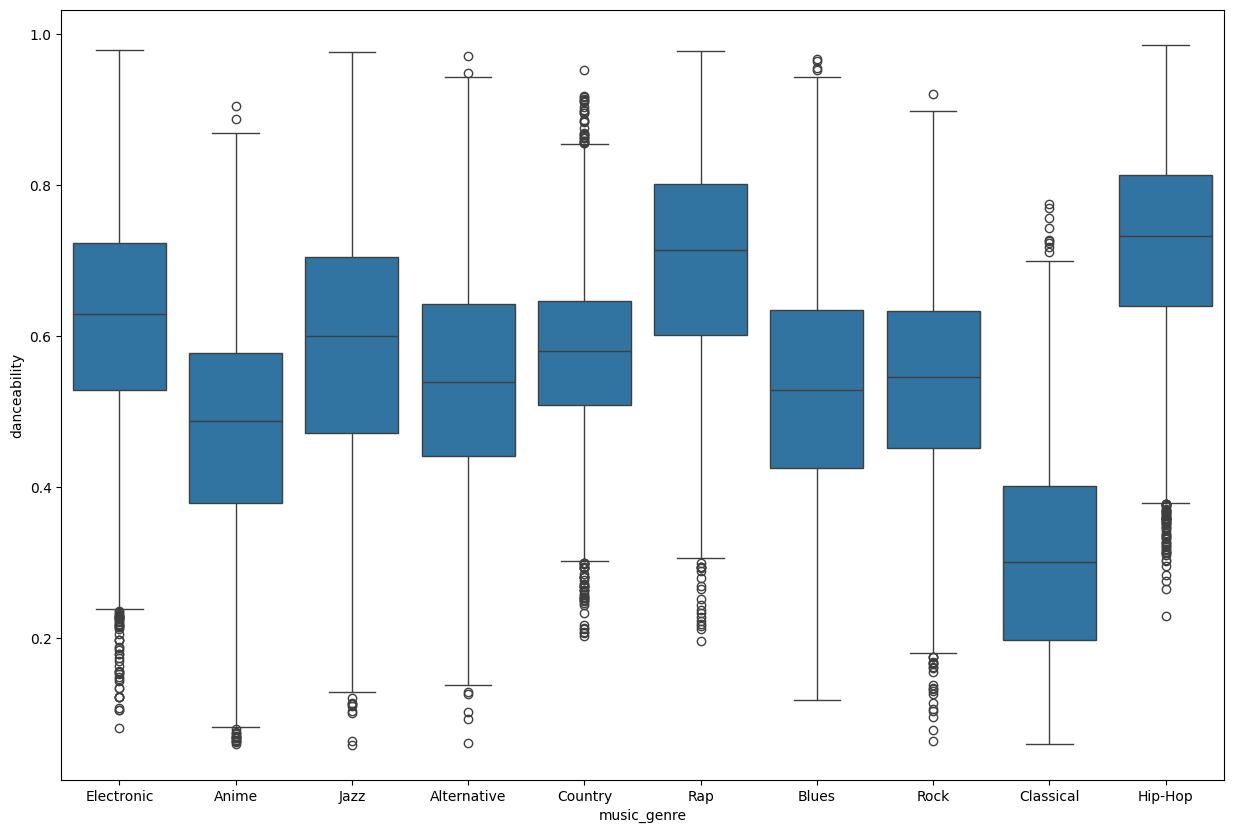

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='danceability')
plt.show()

Si bien en esta gráfica no se aprecia una diferencia en media tan alta como en la anterior, también se puede destacar que el género **Classical** es el menos bailable de todos los géneros. Los demás géneros se encuentran entre 0.4 y 0.8 de puntuación de **danceability**

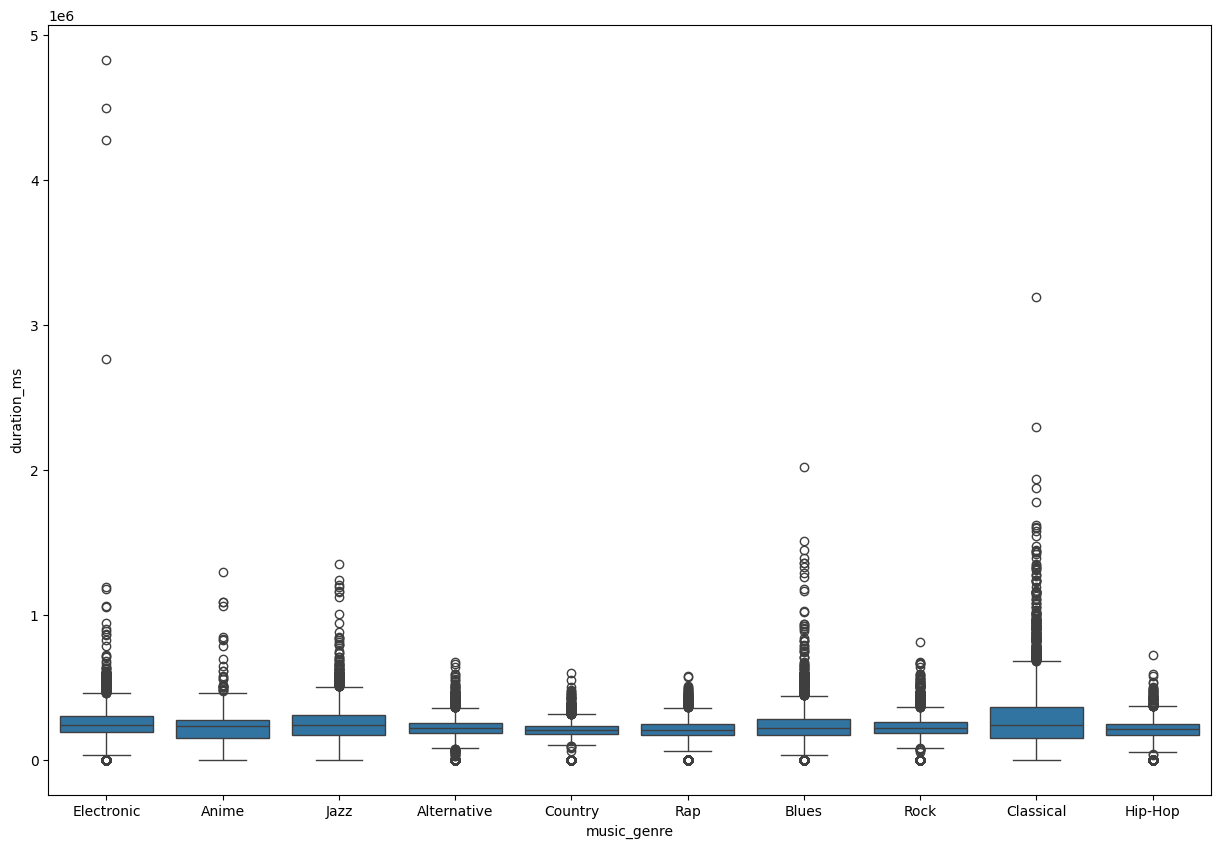

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='duration_ms')
plt.show()

En esta gráfica podemos apreciar que la duración en general ronda en una media similar para todos los géneros, sin embargo, cabe destacar que el género **Electronic** tiene algunos valores atípicos considerablemente superiores con respecto a los demás géneros.

De forma global, parece ser que los géneros **Classical**, **Blues** y **Electronic** cuentan con una mayor cantidad de valores atípicos.

Como se pudo apreciar con anterioridad, contamos con duraciones de -1, lo cual se puede aprecial en la gráfica anterior.

Asumiendo que se trata de valores faltantes, revisemos qué porcentaje de los datos representa esto:

In [ ]:
duracion_negativa = data[data['duration_ms'] == -1].shape[0] #Filtrado de datos con duración -1
num_obs_tot = data.shape[0]
print(f"Hay {duracion_negativa} valores faltantes, i.e. {(duracion_negativa/num_obs_tot)*100:2.4}% de los datos.")

Hay 4939 valores faltantes, i.e. 9.878% de los datos.


In [ ]:
sin_duracion = data[data['duration_ms'] == -1]
sin_duracion['music_genre'].value_counts() #Datos faltantes de duración por género

,count
music_genre,
Rap,512
Classical,511
Rock,507
Jazz,497
Country,492
Alternative,491
Hip-Hop,490
Electronic,483
Blues,483


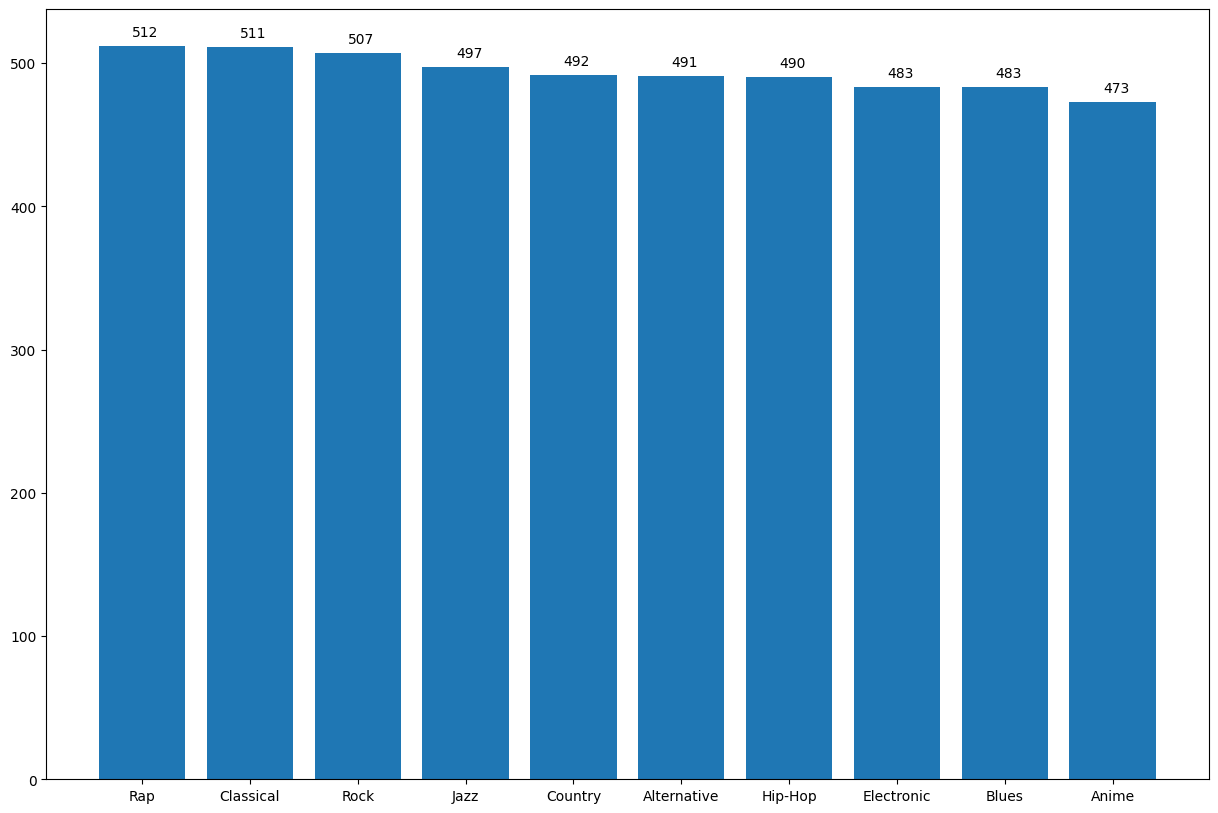

In [ ]:
#Representación gráfica de los valores faltantes de duración por género
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()
plt.bar(sin_duracion['music_genre'].value_counts().keys(), sin_duracion['music_genre'].value_counts())
for i, v in enumerate(sin_duracion['music_genre'].value_counts()):
    ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')
plt.show()

Como se pudo apreciar, en promedio faltan el 10% de los datos por género.

Por esto, se proponen dos ejercicios diferentes (dado que eliminar el 10% de nuestros datos podría perjudicar la eficacia de los modelos), los cuales son:

1. Reemplazar los valores faltantes por la media

2. Reemplazar los valores faltantes por la mediana

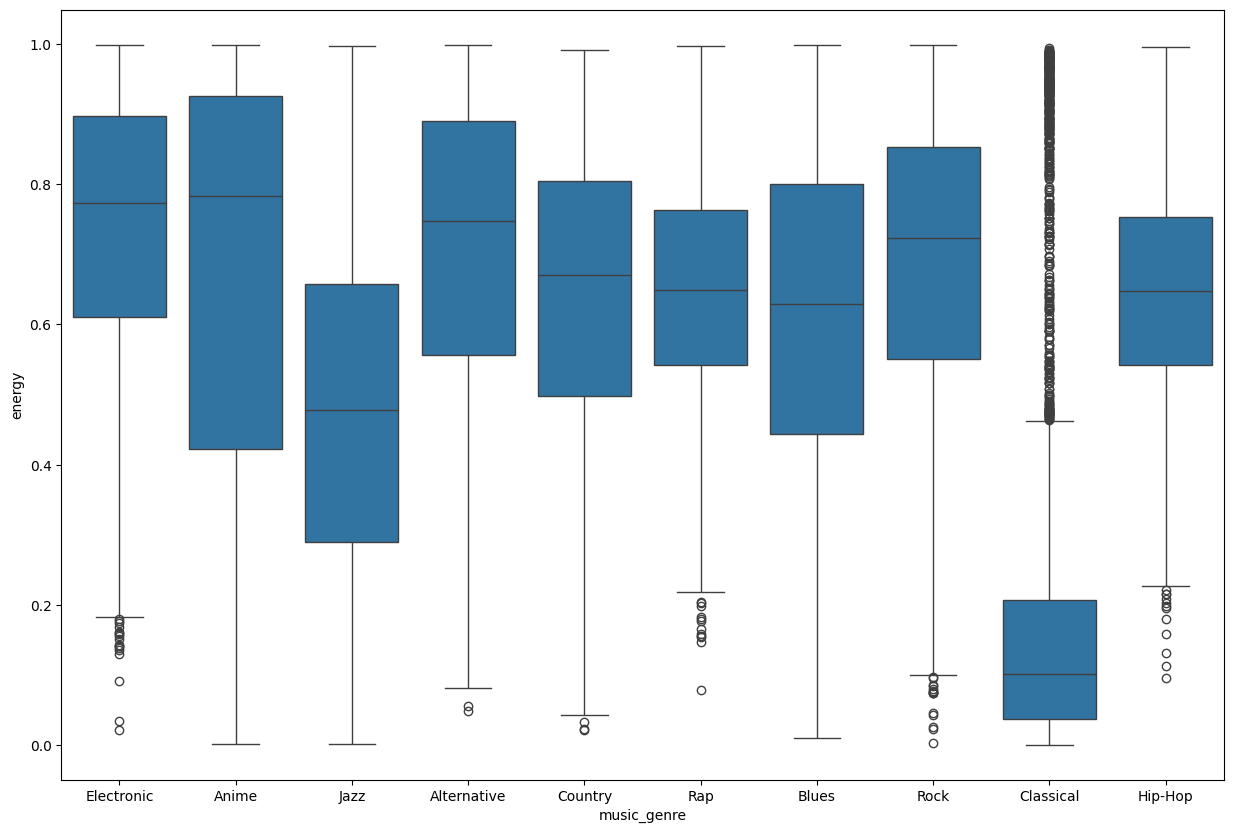

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='energy')
plt.show()

En cuanto a energía, el género **Classical** de nuevo representa un género atípico con una media muy baja con respecto a los demás.

En el caso de **Jazz** también cuenta con una media por debajo de los demás, pero no es tan elevada como en el caso del género **Classical**

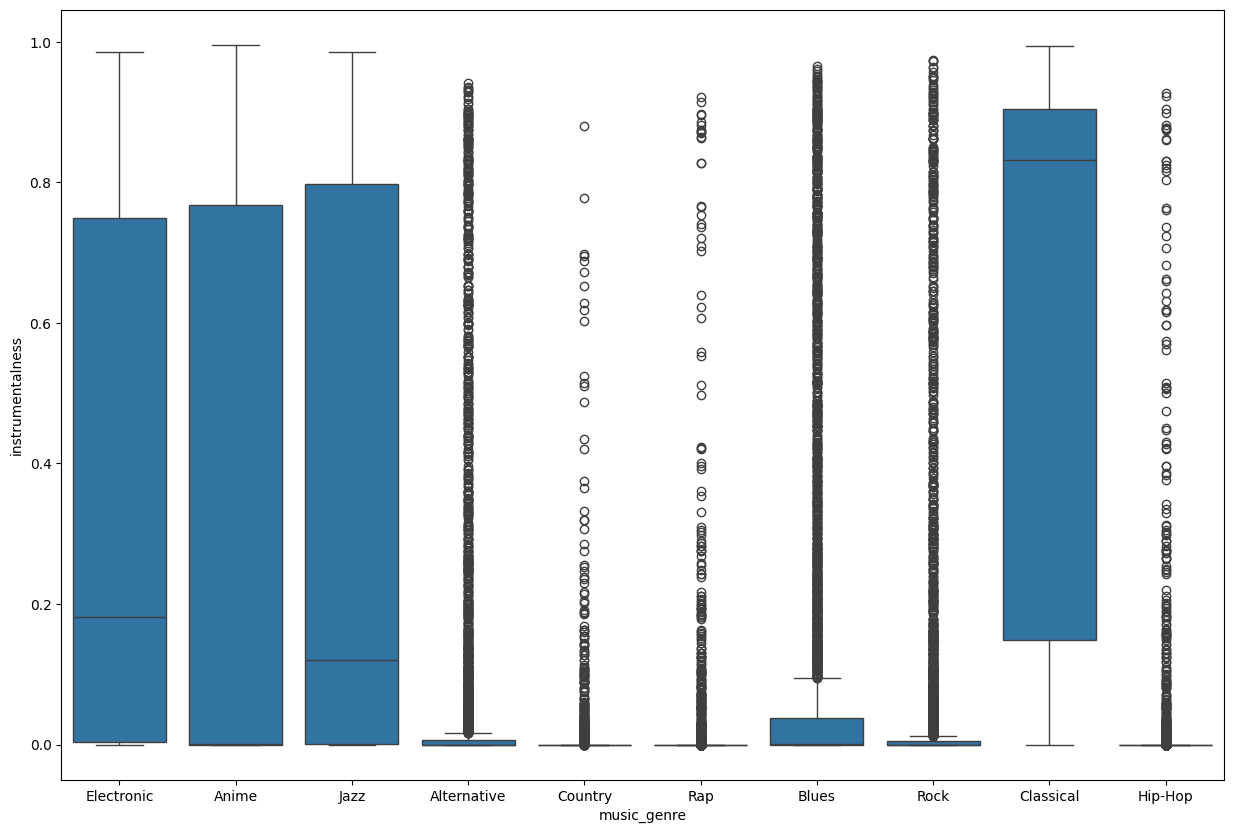

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='instrumentalness')
plt.show()

El atributo de **instrumentalness** de nuevo cuenta con una media que sobresale con respecto a las demás, no obstante, géneros como **Country**, **Rap** y **Hip-Hop** igual cuentan con medias muy bajas y que sobresalen en la representación gráfica.

¿Esto es porque cuentan con valor 0 en **instrumentalness** o porque son valores faltantes?

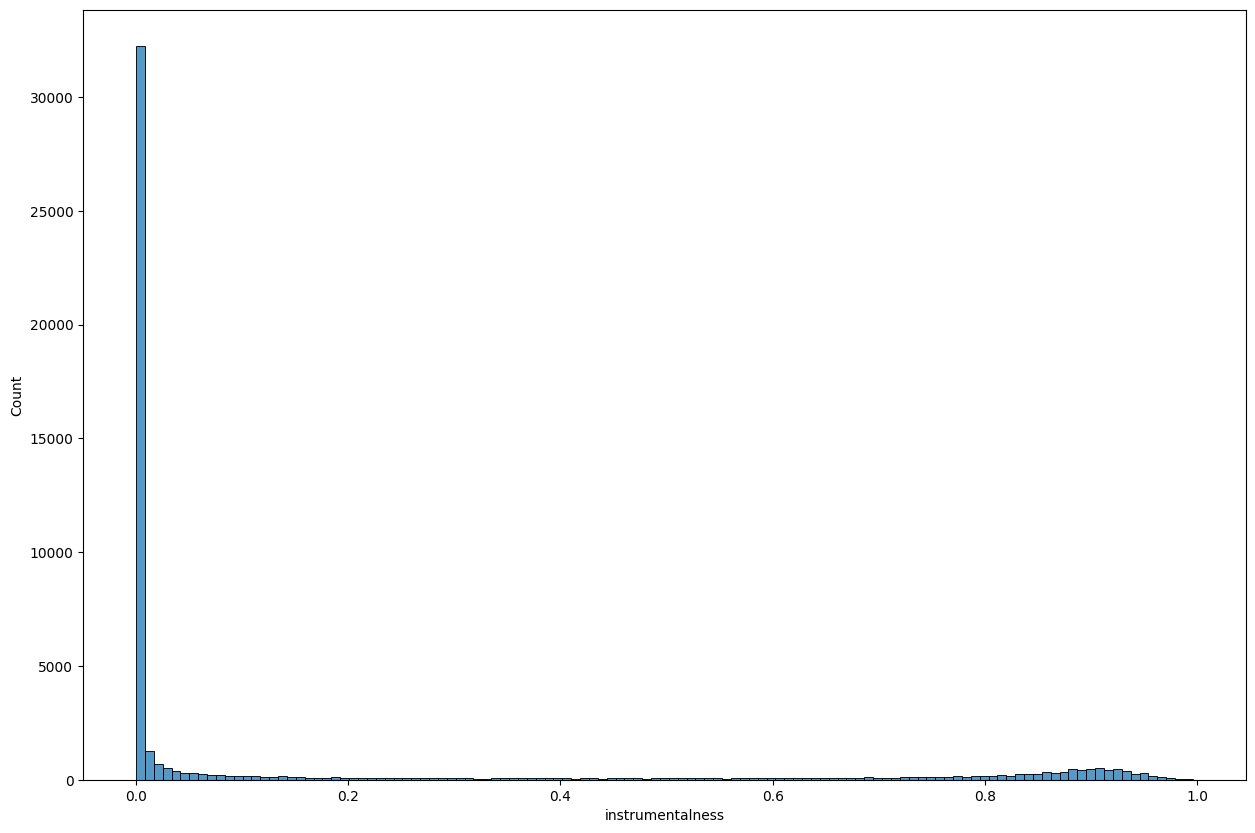

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x='instrumentalness',data=data)
plt.show()

Podemos aprecial que un gran porcentaje de los datos de esta variable están en 0. Este valor no tiene sentido con respecto a los demás.

In [ ]:
zero_instr = data[data['instrumentalness'] == 0].shape[0]
print(f"Hay {zero_instr} valores faltantes, i.e. {(zero_instr/num_obs_tot)*100:2.4}% de los datos.")

Hay 15001 valores faltantes, i.e. 30.0% de los datos.


El 30% de los datos de la variable **instrumentalness** no se encuentran en la base de datos. Por el volumen que representan, es mejor dejar esta variable fuera de nuestros modelos.

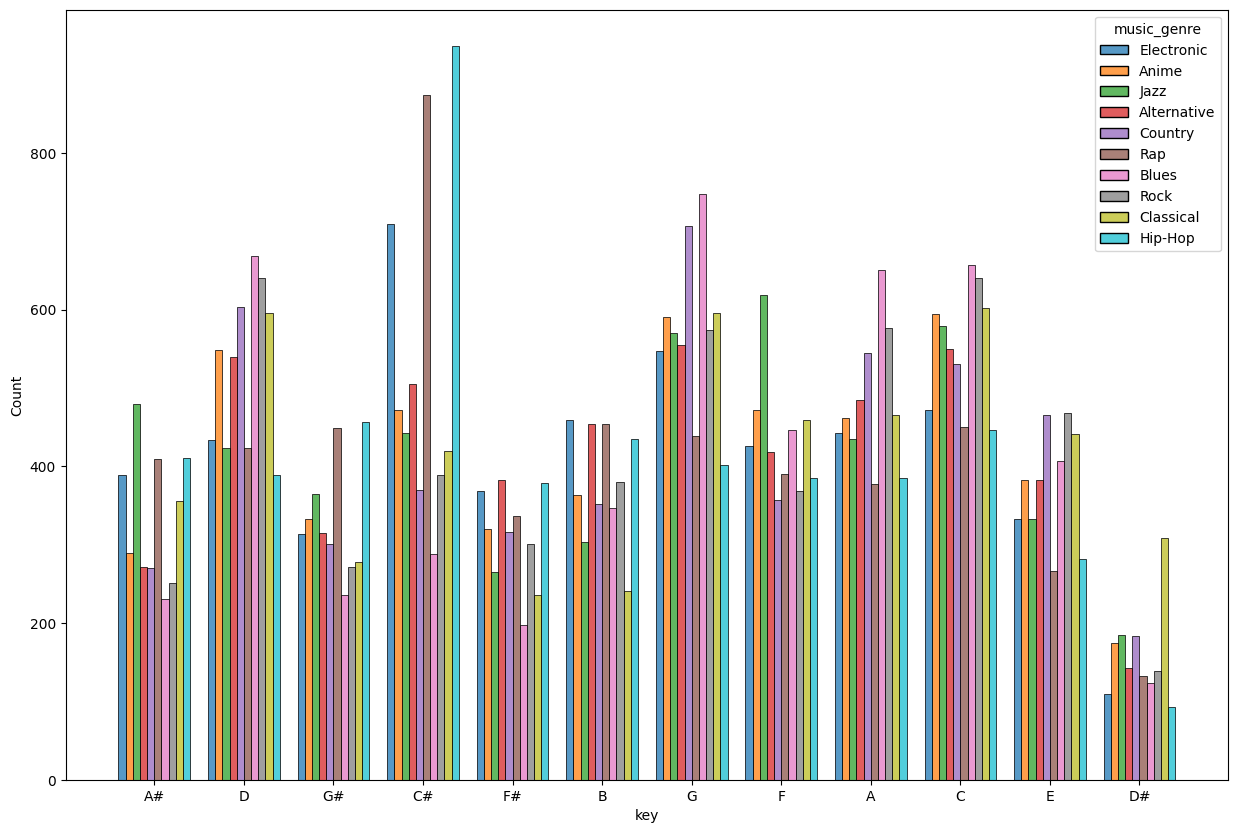

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=data, x='key', hue='music_genre', multiple="dodge", shrink=.8)
plt.show()

La mayoría de las canciones están escritas en tono **C#**. seguido de **G**, **C** y **D**.

Importante destacar que el tono **C#** para **Hip-Hop** y **Rap** es el más escogido para compner.

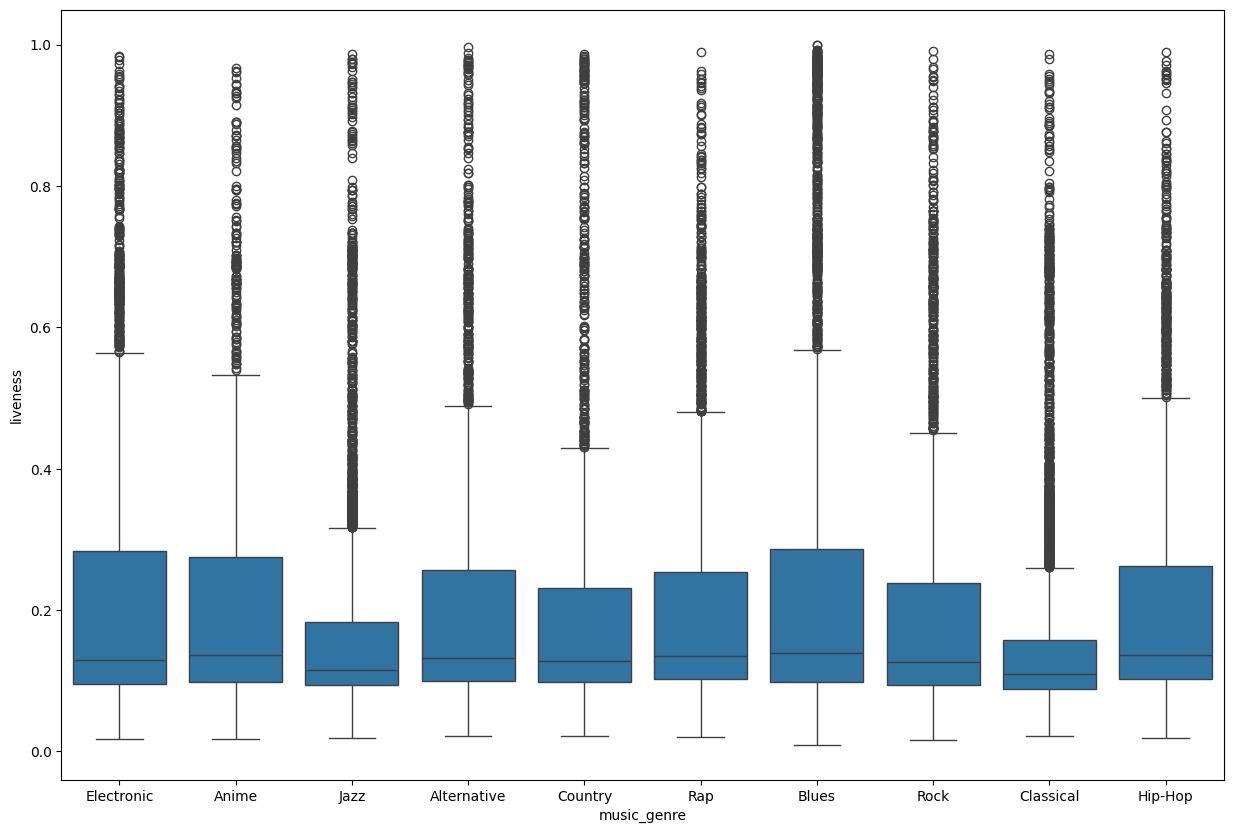

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='liveness')
plt.show()

En cuanto a la variable **liveness** podemos apreciar que, contrario a otras, muestra un comportamiento más estable para todos los géneros.

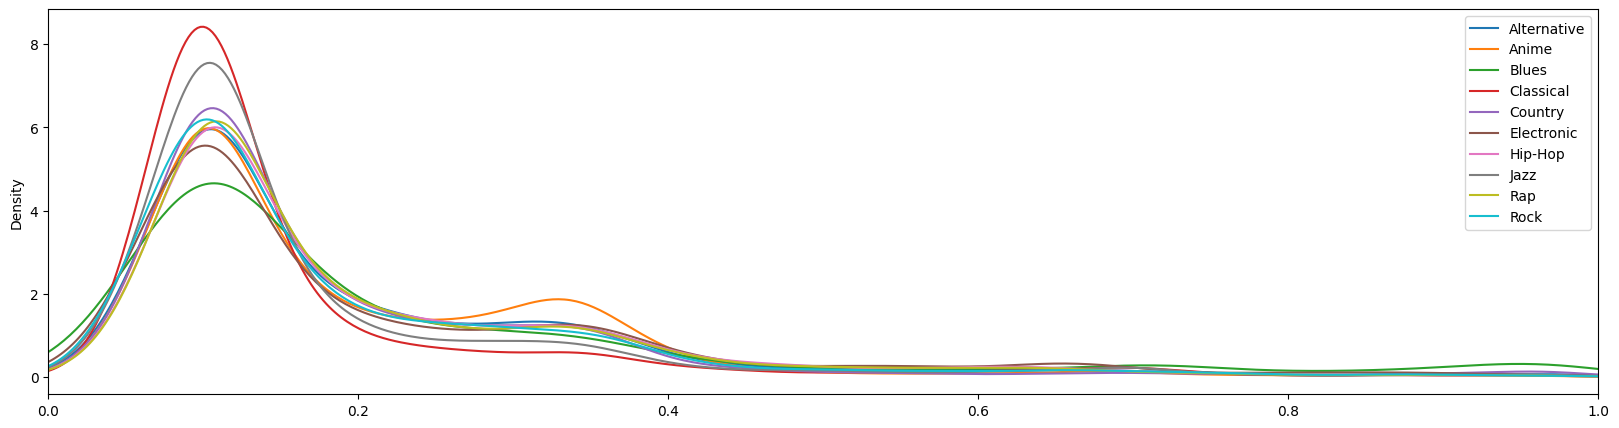

In [ ]:
plt.figure(figsize=(20,5))
data.groupby('music_genre')['liveness'].plot.kde()
plt.legend()
plt.xlim([0,1])
plt.show()

Podemos apreciar que contamos con una distribución de asimetría positiva, lo cual puede apoyar en la elaboración del modelo.

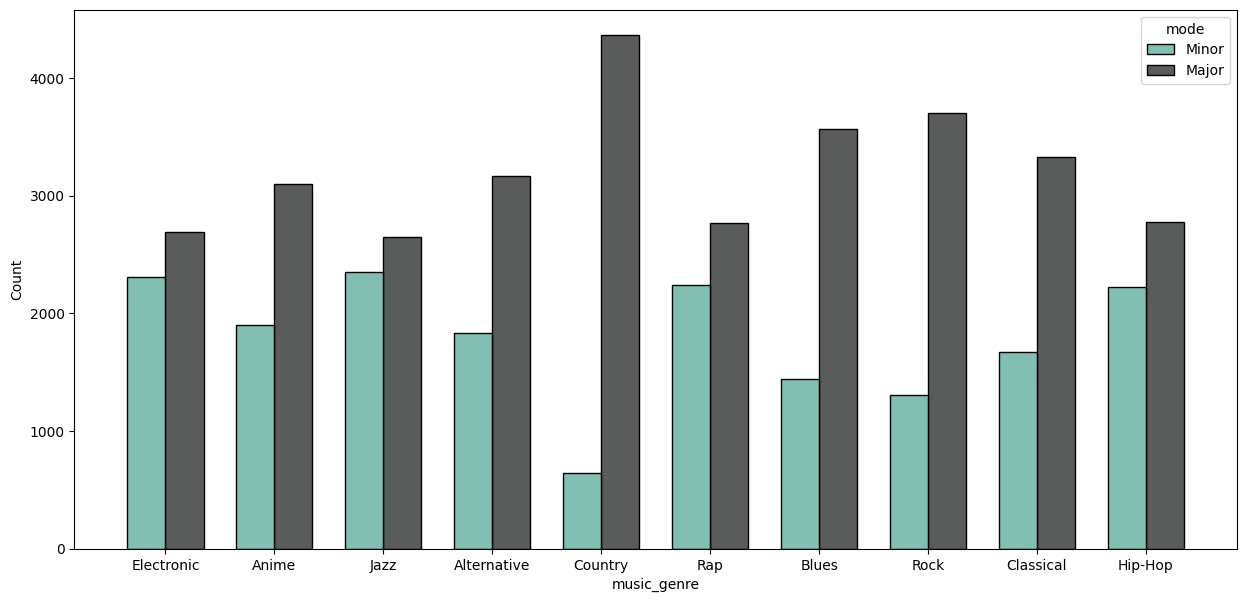

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(data=data, x='music_genre', hue='mode', multiple="dodge", shrink=.7, palette = 'dark:#5A9_r')
plt.show()

En general, la tonalidad **Major** es más utilizada por todos los géneros. Siendo el **Country** el género que más utiliza esta tonalidad.

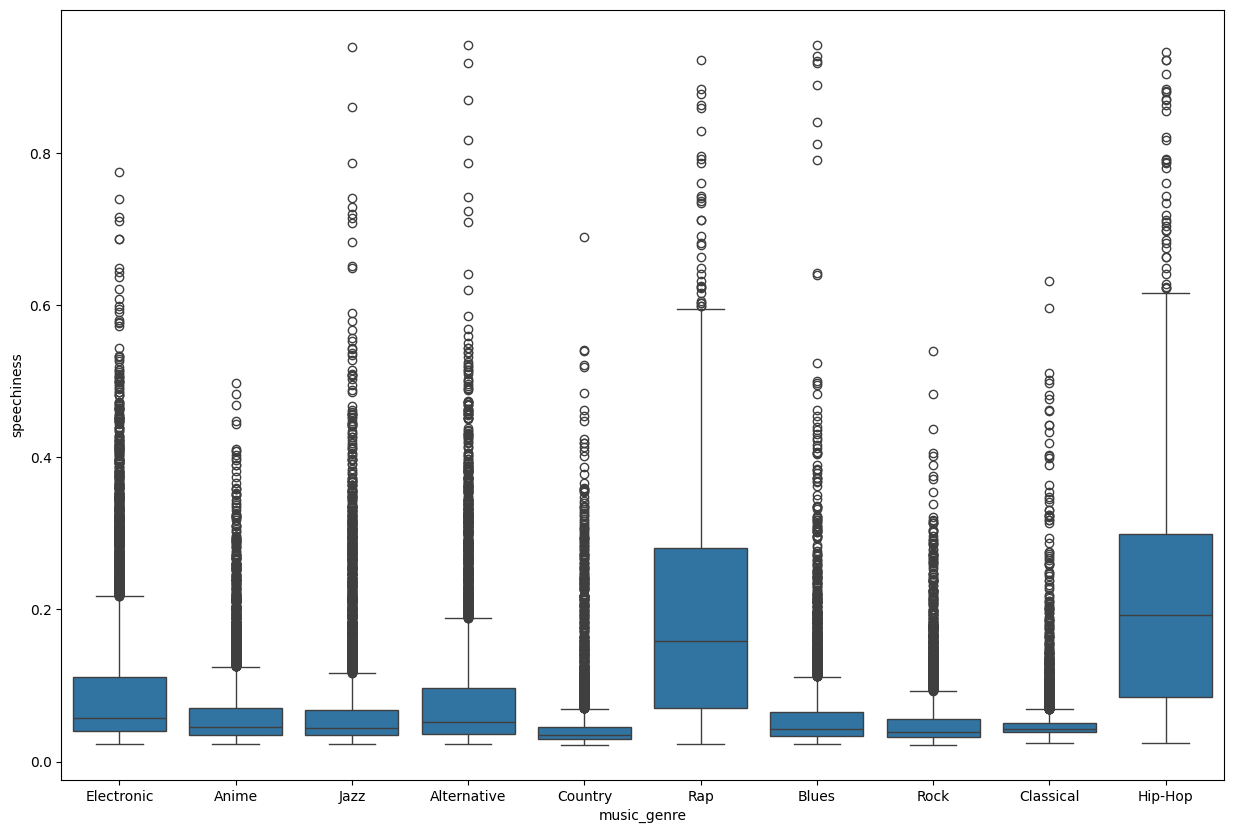

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='speechiness')
plt.show()

Podemos apreciar que **Rap** y **Hip-Hop** son los géneros que más lírica tienen en promedio, sobresaliendo con respecto a los demás.

Revisemos ahora la variable **tempo**

Asumiendo que el dato "?" es sinónimo de faltante, se propone lo siguiente:

In [ ]:
condicion = data['tempo'] == '?'
print(f"Hay {data[condicion].shape[0]} valores faltantes, i.e. {(data[condicion].shape[0]/num_obs_tot)*100:2.4}% de los datos.")

Hay 4980 valores faltantes, i.e. 9.96% de los datos.


In [ ]:
#plt.figure(figsize=(15,10))
#sns.boxplot(data=data, x='music_genre', y='tempo')
#plt.show()

In [ ]:
data['tempo'] = pd.to_numeric(data['tempo'].replace('?', np.nan), errors='coerce') #Convertir todos los datos a tipo numérico y reemplazar los valores con "?" por NaN

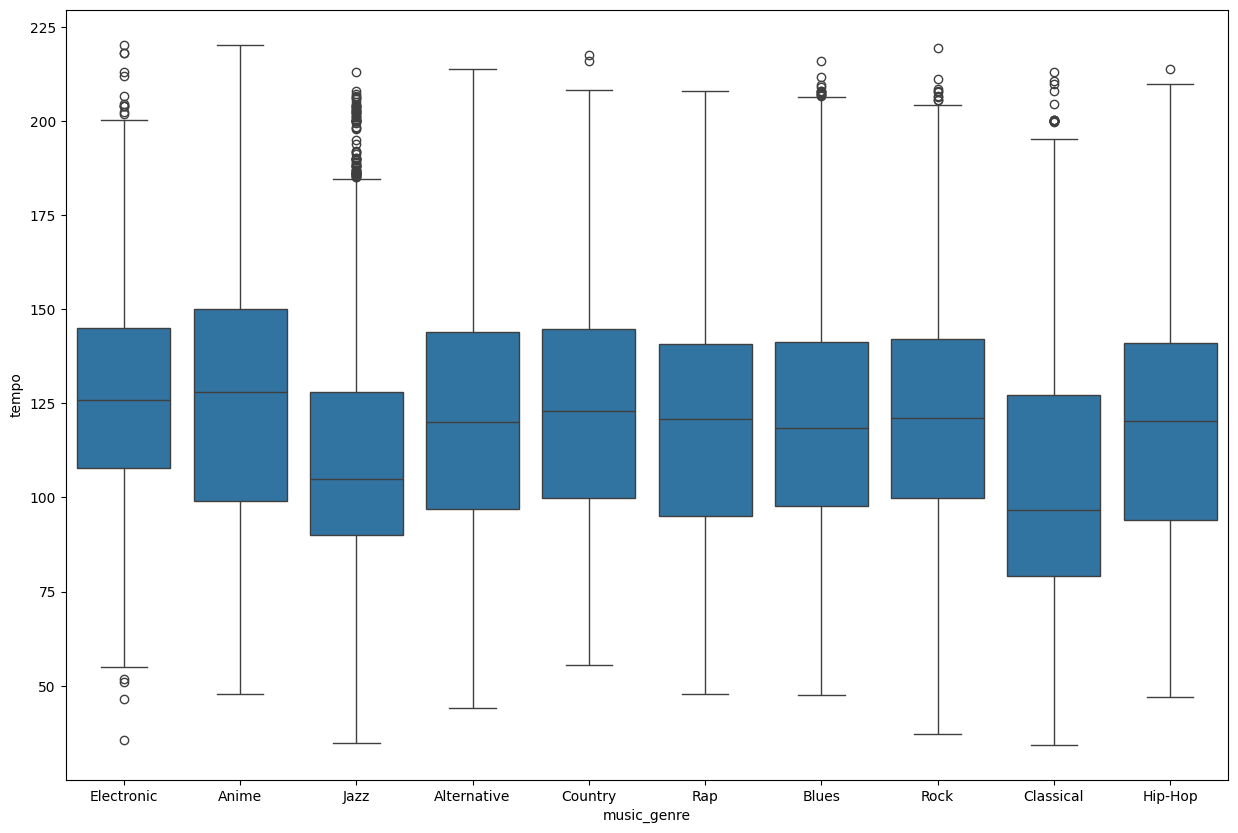

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='tempo')
plt.show()

Si quitamos esos valores, podemos ver que la variable **tempo** es bastante estable para los géneros, sin embargo, podemos destacar que el género **Classical** es de nuevo el género que más se aleja de los demás.

Dado que de nuevo el 10% de los valores en promedio son valores nulos o faltantes, se propone realizar el mismo ejercicio para esta variable que el propuesto en **duration_ms**

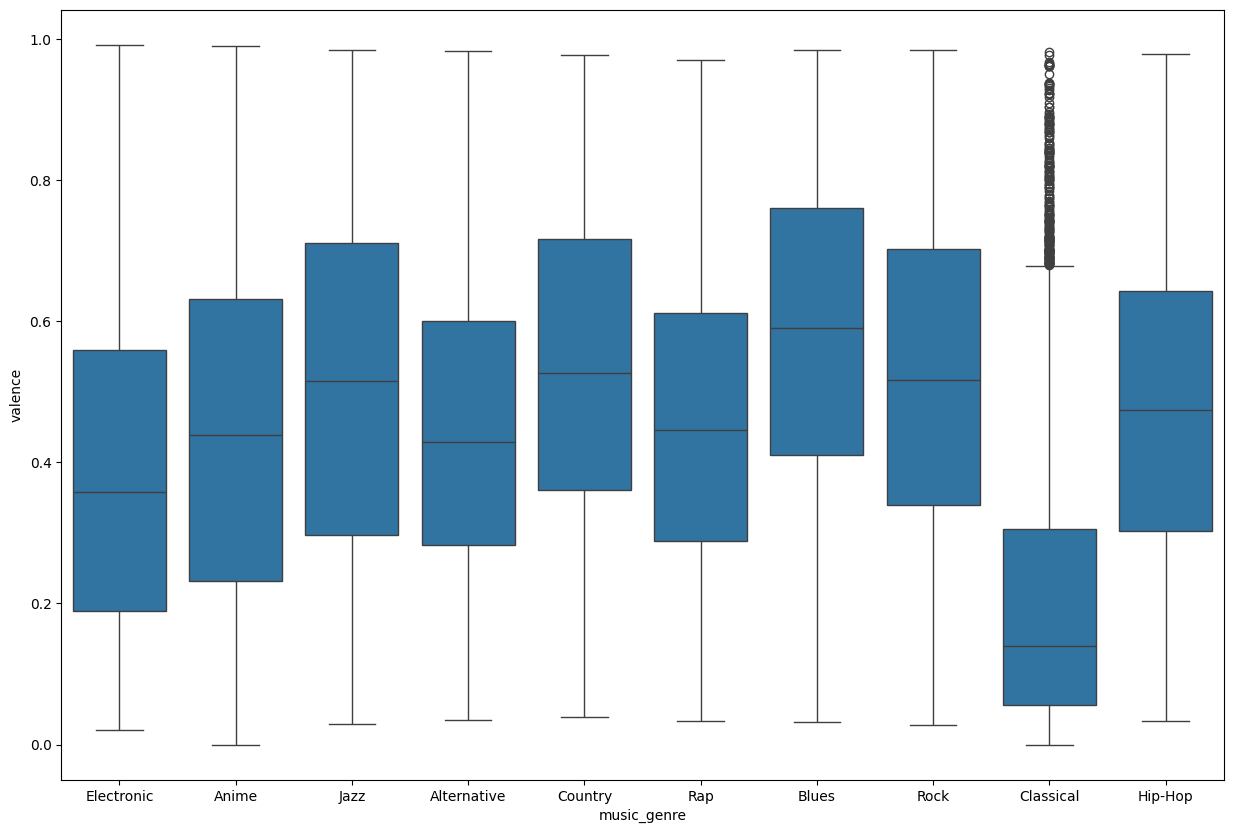

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='music_genre', y='valence')
plt.show()

En esta variable, de nuevo el género **Classical** muestra un comportamiento atípico con respecto al resto de géneros, pues su media está muy por debajo de los demás.

### Ejercicio 1:

Reemplazar la duración de -1 por la media y el tempo ? por la media

In [ ]:
#Creación de un diccionario que contenga la media por género
filtro = data['duration_ms'] != -1
dur_x_genero = {}
for genero, media in zip(data[filtro].groupby('music_genre')['duration_ms'].mean().keys(), data[filtro].groupby('music_genre')['duration_ms'].mean()):
    dur_x_genero[genero] = round(media,2)
dur_x_genero

{'Alternative': 233316.6,
 'Anime': 230705.68,
 'Blues': 253820.23,
 'Classical': 309661.89,
 'Country': 216899.03,
 'Electronic': 270703.43,
 'Hip-Hop': 219951.27,
 'Jazz': 264371.03,
 'Rap': 218927.02,
 'Rock': 236833.31}

In [ ]:
#Reemplazar el valor -1 por la media dependiendo del género que le corresponda a cada registro
data_mean = data.copy()
for fila in data_mean[data_mean['duration_ms'] == -1].index:
  data_mean['duration_ms'][fila] = dur_x_genero[data_mean['music_genre'][fila]]
data_mean.head()

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_mean['duration_ms'][fila] = dur_x_genero[data_mean['music_genre'][fila]]
<ipython-input-47-574c01dbc594>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,270703.43,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.00,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.00,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.00,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.00,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
#Creación de un diccionario que contenga la media de tempo por género
condicion = data['tempo'].notna()
tempo_x_genero = {}
for genero, media in zip(data[condicion].groupby('music_genre')['tempo'].mean().keys(), data[condicion].groupby('music_genre')['tempo'].mean()):
    tempo_x_genero[genero] = round(media,2)
tempo_x_genero

{'Alternative': 122.55,
 'Anime': 126.8,
 'Blues': 121.38,
 'Classical': 104.05,
 'Country': 123.78,
 'Electronic': 125.93,
 'Hip-Hop': 120.15,
 'Jazz': 111.7,
 'Rap': 120.59,
 'Rock': 122.67}

In [ ]:
#Reemplazar el valor ? por la media dependiendo del género que le corresponda a cada registro
for fila in data_mean[data_mean['tempo'].isnull()].index:
    data_mean['tempo'][fila] = tempo_x_genero[data_mean['music_genre'][fila]]
data_mean.head(6)

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_mean['tempo'][fila] = tempo_x_genero[data_mean['music_genre'][fila]]
<ipython-input-49-24c5955c02b2>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = 

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,270703.43,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.00,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.00,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.00,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.00,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.00,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,125.930,4-Apr,0.614,Electronic


In [ ]:
#Eliminamos las variables que, después de nuestro análisis exploratorio determinamos que no serán útiles en nuestros modelos
data_mean_clean = data_mean.drop(['instance_id', 'artist_name', 'track_name', 'instrumentalness', 'obtained_date'], axis = 1)
data_mean_clean.head()

,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,270703.43,0.941,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.00,0.890,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.00,0.755,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.00,0.700,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.00,0.587,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [ ]:
data_mean_clean.isna().sum() #Verificamos que no existan valores nulos o faltantes

,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


In [ ]:
#Creamos nuestras variables X e y para nuestro modelo
X = data_mean_clean.iloc[ : , :-1].values
y = data_mean_clean.iloc[ : , -1].values

In [ ]:
#Codificamos la variable mode para que se vuelva numérica y pueda entrar en el modelo
le = LabelEncoder()
X[:,8] = le.fit_transform(X[:,8])
X[0]

array([27.0, 0.00468, 0.652, 270703.43, 0.941, 'A#', 0.115,
       -5.2010000000000005, 1, 0.0748, 100.889, 0.759], dtype=object)

In [ ]:
#Codificamos la variable key para que se vuelva numérica y pueda entrar en el modelo
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5])], remainder = 'passthrough')
X = ct.fit_transform(X)
X[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.0,
       0.00468, 0.652, 270703.43, 0.941, 0.115, -5.2010000000000005, 1,
       0.0748, 100.889, 0.759], dtype=object)

### Separación en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Modelo 1: KNN

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
neigh_pred = neigh.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, neigh_pred)
print(acc)

0.24416


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
neigh2 = KNeighborsClassifier()
neigh2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
neigh2_pred = neigh2.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, neigh2_pred)
print(acc)

0.4408


El modelo de KNN mejora casi al doble al momento de estandarizar nuestras observaciones, sin embargo, el nivel de acertividad no es tan elevado.

### Modelo 2: SVM

In [ ]:
X = data_mean_clean.iloc[ : , :-1].values
y = data_mean_clean.iloc[ : , -1].values

In [ ]:
le = LabelEncoder()
X[:,8] = le.fit_transform(X[:,8])

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
model = LinearSVC()

In [ ]:
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
acc = accuracy_score(y_test, model_pred)
print(acc)

0.29432


In [ ]:
model.coef_

array([[-4.47233512e-06, -1.00671305e-05,  6.41903747e-07,
        -5.48684698e-06, -1.25611931e-05, -6.55677505e-06,
        -3.82242650e-06, -5.12794493e-06, -5.85741506e-06,
         4.14547222e-07, -7.83045659e-06, -6.05831893e-06,
        -6.23085955e-04, -8.61882754e-05, -5.22818420e-05,
        -1.28900257e-06,  1.16819937e-05, -1.05078967e-05,
         1.71631194e-03, -1.92801354e-05, -1.04749551e-05,
        -3.58729433e-03, -4.08620746e-05],
       [-2.15063753e-05, -1.92809902e-05, -8.04619673e-06,
         7.71400702e-07, -1.40392240e-05, -1.14863860e-05,
        -3.26971569e-06, -5.65213724e-06, -3.07837572e-06,
        -1.11573432e-07, -1.83055540e-05, -4.02208106e-06,
        -2.04504371e-02, -1.44580683e-04, -1.51119067e-04,
        -7.11246025e-07,  7.16544506e-05, -2.55785965e-05,
         3.98893265e-03,  1.12499259e-06, -3.73528357e-05,
         2.06550671e-03, -7.21446413e-05],
       [ 3.50313257e-05, -4.77178821e-05, -1.90337154e-05,
         1.24565154e-05, -7.9

In [ ]:
model.intercept_

array([-6.67843918e-05, -1.08027209e-04, -1.76119423e-04, -2.07646874e-04,
       -1.42524638e-04, -4.28581136e-04, -8.01050016e-04, -4.70850715e-05,
       -3.30725153e-04, -4.02276250e-05])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model2 = LinearSVC()
model2.fit(X_train, y_train)

LinearSVC()

In [ ]:
model2_pred = model2.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, model2_pred)
print(acc)

0.48376


In [ ]:
model.coef_

array([[-4.47233512e-06, -1.00671305e-05,  6.41903747e-07,
        -5.48684698e-06, -1.25611931e-05, -6.55677505e-06,
        -3.82242650e-06, -5.12794493e-06, -5.85741506e-06,
         4.14547222e-07, -7.83045659e-06, -6.05831893e-06,
        -6.23085955e-04, -8.61882754e-05, -5.22818420e-05,
        -1.28900257e-06,  1.16819937e-05, -1.05078967e-05,
         1.71631194e-03, -1.92801354e-05, -1.04749551e-05,
        -3.58729433e-03, -4.08620746e-05],
       [-2.15063753e-05, -1.92809902e-05, -8.04619673e-06,
         7.71400702e-07, -1.40392240e-05, -1.14863860e-05,
        -3.26971569e-06, -5.65213724e-06, -3.07837572e-06,
        -1.11573432e-07, -1.83055540e-05, -4.02208106e-06,
        -2.04504371e-02, -1.44580683e-04, -1.51119067e-04,
        -7.11246025e-07,  7.16544506e-05, -2.55785965e-05,
         3.98893265e-03,  1.12499259e-06, -3.73528357e-05,
         2.06550671e-03, -7.21446413e-05],
       [ 3.50313257e-05, -4.77178821e-05, -1.90337154e-05,
         1.24565154e-05, -7.9

In [ ]:
model.intercept_

array([-6.67843918e-05, -1.08027209e-04, -1.76119423e-04, -2.07646874e-04,
       -1.42524638e-04, -4.28581136e-04, -8.01050016e-04, -4.70850715e-05,
       -3.30725153e-04, -4.02276250e-05])

Si bien el modelo de SVC es peor que el modelo de KNN para el caso de los datos no estandarizados, al momento de estandarizar los datos sí se nota una mayor mejora en el modelo.

### Modelo 3: Naive Bayes

In [ ]:
X = data_mean_clean.iloc[ : , :-1].drop('loudness', axis=1)
X

,popularity,acousticness,danceability,duration_ms,energy,key,liveness,mode,speechiness,tempo,valence
0,27.0,0.00468,0.652,270703.43,0.941,A#,0.115,Minor,0.0748,100.889,0.759
1,31.0,0.01270,0.622,218293.00,0.890,D,0.124,Minor,0.0300,115.002,0.531
2,28.0,0.00306,0.620,215613.00,0.755,G#,0.534,Major,0.0345,127.994,0.333
3,34.0,0.02540,0.774,166875.00,0.700,C#,0.157,Major,0.2390,128.014,0.270
4,32.0,0.00465,0.638,222369.00,0.587,F#,0.157,Major,0.0413,145.036,0.323
...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,219951.27,0.574,C#,0.119,Major,0.2980,98.028,0.330
50001,72.0,0.15700,0.709,251860.00,0.362,B,0.109,Major,0.0550,122.043,0.113
50002,51.0,0.00597,0.693,189483.00,0.763,D,0.143,Major,0.1460,131.079,0.395
50003,65.0,0.08310,0.782,262773.00,0.472,G,0.106,Minor,0.0441,75.886,0.354


In [ ]:
X = data_mean_clean.iloc[ : , :-1].drop('loudness', axis=1).values
y = data_mean_clean.iloc[ : , -1].values

In [ ]:
le = LabelEncoder()
X[:,7] = le.fit_transform(X[:,7])
X[0]

array([27.0, 0.00468, 0.652, 270703.43, 0.941, 'A#', 0.115, 1, 0.0748,
       100.889, 0.759], dtype=object)

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5])], remainder = 'passthrough')
X = ct.fit_transform(X)
X[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.0,
       0.00468, 0.652, 270703.43, 0.941, 0.115, 1, 0.0748, 100.889, 0.759],
      dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

In [ ]:
pred = NB.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.2752

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Para este último modelo, no se puede hacer una diferenciación entre datos estandarizados y datos normales, además de que una de las columnas debió ser dejada atrás debido a las limitaciones de este.

### Ejercicio 2

Reemplazar la duración de -1 por la mediana

In [ ]:
#Creación de un diccionario que contenga la mediana de duración por género
filtro = data['duration_ms'] != -1
dur_x_genero2 = {}
for genero, mediana in zip(data[filtro].groupby('music_genre')['duration_ms'].median().keys(), data[filtro].groupby('music_genre')['duration_ms'].median()):
    dur_x_genero2[genero] = round(mediana,2)
dur_x_genero2

{'Alternative': 225691.0,
 'Anime': 238820.0,
 'Blues': 230227.0,
 'Classical': 262000.0,
 'Country': 211626.5,
 'Electronic': 245217.0,
 'Hip-Hop': 215240.0,
 'Jazz': 247850.0,
 'Rap': 214447.0,
 'Rock': 225347.0}

In [ ]:
#Reemplazar el valor -1 por la mediana dependiendo del género que le corresponda a cada registro
data_median = data.copy()
for fila in data_median[data_median['duration_ms'] == -1].index:
  data_median['duration_ms'][fila] = dur_x_genero2[data_median['music_genre'][fila]]
data_median.head()

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_median['duration_ms'][fila] = dur_x_genero2[data_median['music_genre'][fila]]
<ipython-input-110-d1a6e1da426c>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer,

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245217.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
#Creación de un diccionario que contenga la mediana de tempo por género
condicion = data['tempo'].notna()
tempo_x_genero2 = {}
for genero, mediana in zip(data[condicion].groupby('music_genre')['tempo'].median().keys(), data[condicion].groupby('music_genre')['tempo'].median()):
    tempo_x_genero2[genero] = round(media,2)
tempo_x_genero2

{'Alternative': 122.67,
 'Anime': 122.67,
 'Blues': 122.67,
 'Classical': 122.67,
 'Country': 122.67,
 'Electronic': 122.67,
 'Hip-Hop': 122.67,
 'Jazz': 122.67,
 'Rap': 122.67,
 'Rock': 122.67}

In [ ]:
#Reemplazar el valor ? por la mediana dependiendo del género que le corresponda a cada registro
for fila in data_median[data_median['tempo'].isnull()].index:
  data_median['tempo'][fila] = tempo_x_genero2[data_median['music_genre'][fila]]
data_median.head(6)

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_median['tempo'][fila] = tempo_x_genero2[data_median['music_genre'][fila]]
<ipython-input-112-db365f95ffcd>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "co

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245217.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,122.670,4-Apr,0.614,Electronic


In [ ]:
#Conservamos solo las variables que usaremos para el modelo
data_median_clean = data_median.drop(['instance_id', 'artist_name', 'track_name', 'instrumentalness', 'obtained_date'], axis = 1)
data_median_clean.head()

,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,245217.0,0.941,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [ ]:
data_median_clean.isna().sum() #Verificamos que no tengan valores faltantes

,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


In [ ]:
#Seleccionamos las variables para X e y
X = data_median_clean.iloc[ : , :-1].values
y = data_median_clean.iloc[ : , -1].values

In [ ]:
#Codficamos las variables categóricas de mode
le = LabelEncoder()
X[:,8] = le.fit_transform(X[:,8])
X[0]

array([27.0, 0.00468, 0.652, 245217.0, 0.941, 'A#', 0.115,
       -5.2010000000000005, 1, 0.0748, 100.889, 0.759], dtype=object)

In [ ]:
#Codficamos las variables de key
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5])], remainder = 'passthrough')
X = ct.fit_transform(X)
X[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.0,
       0.00468, 0.652, 245217.0, 0.941, 0.115, -5.2010000000000005, 1,
       0.0748, 100.889, 0.759], dtype=object)

### Separación en conjunto de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Modelo 2: KNN

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
neigh_pred = neigh.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, neigh_pred)
print(acc)

0.24448


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
neigh2 = KNeighborsClassifier()
neigh2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
neigh2_pred = neigh2.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, neigh2_pred)
print(acc)

0.43872


### Conclusiones:

De nuevo, este modelo presenta mejoría al estandarizar las variables, casi duplicando la exactitud del modelo.

### Modelo 2: SVC

In [ ]:
X = data_median_clean.iloc[ : , :-1].values
y = data_median_clean.iloc[ : , -1].values

In [ ]:
le = LabelEncoder()
X[:,8] = le.fit_transform(X[:,8])

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [ ]:
model_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, model_pred)
print(acc)

0.292


In [ ]:
model.coef_

array([[-4.30868098e-06, -9.28260219e-06,  4.74942792e-07,
        -5.30696581e-06, -1.16632012e-05, -6.14948861e-06,
        -3.57259124e-06, -4.88512001e-06, -5.49610915e-06,
         3.01280151e-07, -7.29922633e-06, -5.63476591e-06,
        -6.27733450e-04, -7.98932624e-05, -4.86476550e-05,
        -1.25168548e-06,  1.00312922e-05, -9.96694386e-06,
         1.59787222e-03, -1.81236811e-05, -9.74895887e-06,
        -3.67728376e-03, -3.81467434e-05],
       [-2.03447813e-05, -1.83727305e-05, -7.79307355e-06,
         9.18894214e-08, -1.30951518e-05, -1.10699193e-05,
        -3.17853310e-06, -5.52494860e-06, -3.13602153e-06,
        -5.82274400e-07, -1.75122787e-05, -3.74686853e-06,
        -1.92206235e-02, -1.36792084e-04, -1.41741115e-04,
        -6.69132510e-07,  6.53501643e-05, -2.42879142e-05,
         3.76313171e-03, -1.40263651e-06, -3.44910031e-05,
         1.60630920e-03, -6.65831158e-05],
       [ 3.68851408e-05, -4.92307833e-05, -1.94015071e-05,
         1.33955944e-05, -8.2

In [ ]:
model.intercept_

array([-6.28225285e-05, -1.04264692e-04, -1.78390586e-04, -2.15752241e-04,
       -1.42749575e-04, -4.20920912e-04, -8.20570409e-04, -4.77768439e-05,
       -1.09795104e-03, -4.00774456e-05])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model2 = LinearSVC()
model2.fit(X_train, y_train)

LinearSVC()

In [ ]:
model2_pred = model2.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, model2_pred)
print(acc)

0.48256


In [ ]:
model.coef_

array([[-4.30868098e-06, -9.28260219e-06,  4.74942792e-07,
        -5.30696581e-06, -1.16632012e-05, -6.14948861e-06,
        -3.57259124e-06, -4.88512001e-06, -5.49610915e-06,
         3.01280151e-07, -7.29922633e-06, -5.63476591e-06,
        -6.27733450e-04, -7.98932624e-05, -4.86476550e-05,
        -1.25168548e-06,  1.00312922e-05, -9.96694386e-06,
         1.59787222e-03, -1.81236811e-05, -9.74895887e-06,
        -3.67728376e-03, -3.81467434e-05],
       [-2.03447813e-05, -1.83727305e-05, -7.79307355e-06,
         9.18894214e-08, -1.30951518e-05, -1.10699193e-05,
        -3.17853310e-06, -5.52494860e-06, -3.13602153e-06,
        -5.82274400e-07, -1.75122787e-05, -3.74686853e-06,
        -1.92206235e-02, -1.36792084e-04, -1.41741115e-04,
        -6.69132510e-07,  6.53501643e-05, -2.42879142e-05,
         3.76313171e-03, -1.40263651e-06, -3.44910031e-05,
         1.60630920e-03, -6.65831158e-05],
       [ 3.68851408e-05, -4.92307833e-05, -1.94015071e-05,
         1.33955944e-05, -8.2

In [ ]:
model.intercept_

array([-6.28225285e-05, -1.04264692e-04, -1.78390586e-04, -2.15752241e-04,
       -1.42749575e-04, -4.20920912e-04, -8.20570409e-04, -4.77768439e-05,
       -1.09795104e-03, -4.00774456e-05])

Este modelo también presenta mejorías significativas al momento de estandarizar las variables

### Modelo 3: Naive Bayes

In [ ]:
X = data_median_clean.iloc[ : , :-1].drop('loudness', axis=1).values
y = data_median_clean.iloc[ : , -1].values

In [ ]:
le = LabelEncoder()
X[:,7] = le.fit_transform(X[:,7])
X[0]

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5])], remainder = 'passthrough')
X = ct.fit_transform(X)
X[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
NB = MultinomialNB()
NB.fit(X_train, y_train)

In [ ]:
pred = NB.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

### Conclusiones en general:

Pareciera ser que los datos seleccionados para la realización de los modelos no se adecúan bien a estos últimos, ya que ninguno sobrepasa el 0.6 de exactitud. Esto puede deberse a la existencia de valores atípicos en las diferentes variables, así como el reemplazo de medias y medianas de los valores faltantes, ya que al final, se está asumiendo que el dato es real cuando no necesariamente lo es, además de que puede generar cierta desviación de los datos en cuanto a sus distribuciones reales. Adicionalmente, la presencia de grandes cantidades de valores atípicos incrementan la variación en la exactitud de estos modelos.No obstante, pudimos observar que al estandarizar los datos, podemos mejorar esta exactitud.

El modelo que mejores resultados arroja en general es el modelo de SVC considerando el ejercicio de reemplazar los datos faltantes por la media, otorgando una exactitud de 0.5464.

Como futuros análisis, podría considerarse el hacer un reemplazo de valores faltantes por una media o mediana global, incrementar el volumen de datos o el homologar géneros como Rap y Hip-Hop, los cuales presentan características similares en varias de sus variables.